In [2]:
#Import dependancied
from GL_method import GL_calculator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# With Gregory data

In [3]:
#Data of Gregory study from 1999 paper
time = [43382.94, 43570.00, 43729.99, 44100.97, 44479.93, 44840.03, 45907.00, 46990.63, 
        47013.02, 47416.00, 47544.20, 48738.80, 49395.88, 49421.77, 49446.61, 49472.19, 
        49500.09, 49530.19, 49555.05, 49580.98, 49607.76, 49634.92, 49659.69, 49689.71, 
        49744.37, 49794.32, 49823.41, 49850.01, 49875.25, 49902.04, 49926.86, 49954.94, 
        49980.74, 50006.58, 50034.83, 50060.72, 50088.72, 50114.35, 50431.66, 50458.60, 
        50486.47, 50516.55, 50547.31, 50568.25, 50594.12, 50627.13, 50650.07, 50675.00, 
        50707.88, 50722.83, 50752.82, 50781.63, 50810.71, 50834.64, 50856.58, 50877.55, 50903.40]

flux = [284.0, 138.0, 180.0, 100.0, 66.0, 309.0, 84.0, 184.0, 164.0, 64.0, 112.0, 198.0, 138.0, 
        200.0, 116.0, 227.0, 214.0, 167.0, 262.0, 170.0, 186.0, 294.0, 265.0, 296.0, 166.0, 
        283.0, 245.0, 169.0, 232.0, 300.0, 306.0, 244.0, 320.0, 236.0, 254.0, 242.0, 269.0, 
        229.0, 216.0, 62.0, 117.0, 193.0, 147.0, 119.0, 132.0, 101.0, 164.0, 188.0, 94.0, 
        186.0, 93.0, 100.0, 124.0, 92.0, 61.0, 135.0, 120.0]

Convert the data into numpy array of required shape

In [4]:
# Create a pandas DataFrame
df = pd.DataFrame({'time': time, 'flux': flux, 'error': 33 })#Using error of 33

#Stacking column to get desired shape
data = np.column_stack((df['time'], df['flux'], df['error']))

In [12]:
#Talking apropirate priors
Priors = {'bins': 7, 'rmin': 50, 'rmax': 350, 'w_min': 0.0036, 'w_max': 0.0040, 'w_resolution': 50}

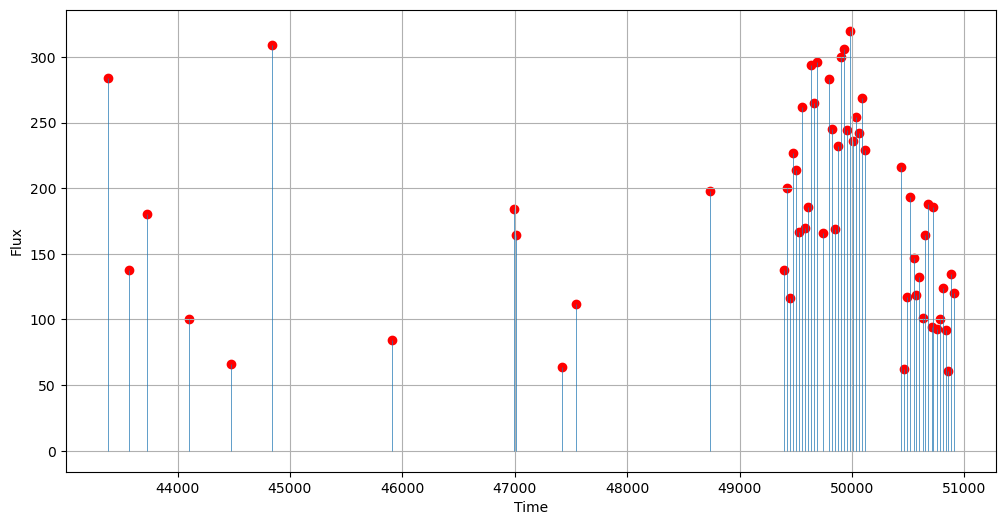

In [13]:
#Instantiate class
pc2 = GL_calculator(data, Priors)
#plot data
pc2.plot_data()

In [14]:
#Perform Single Integral
pc2.Pw_dm()
#Perform Double Integral
pc2.Pd_m()

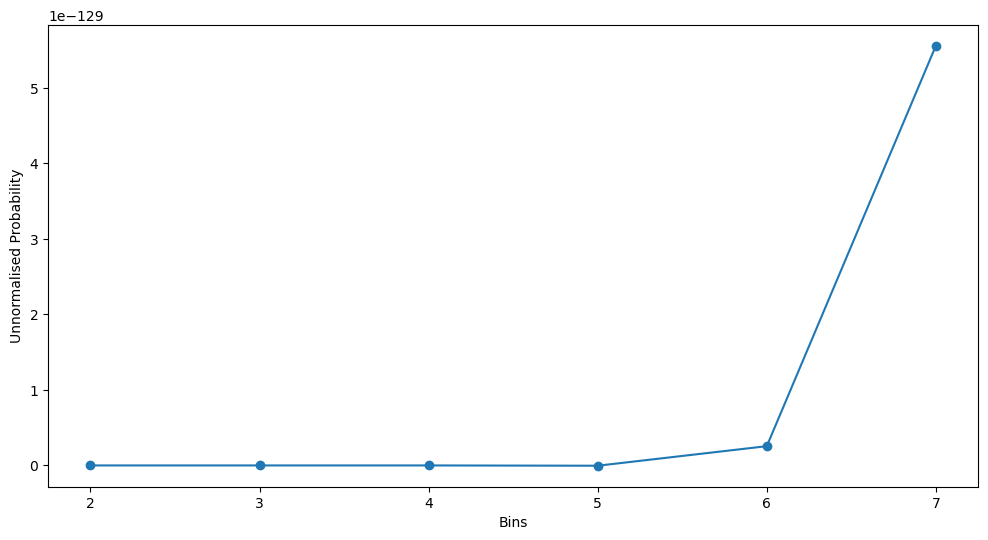

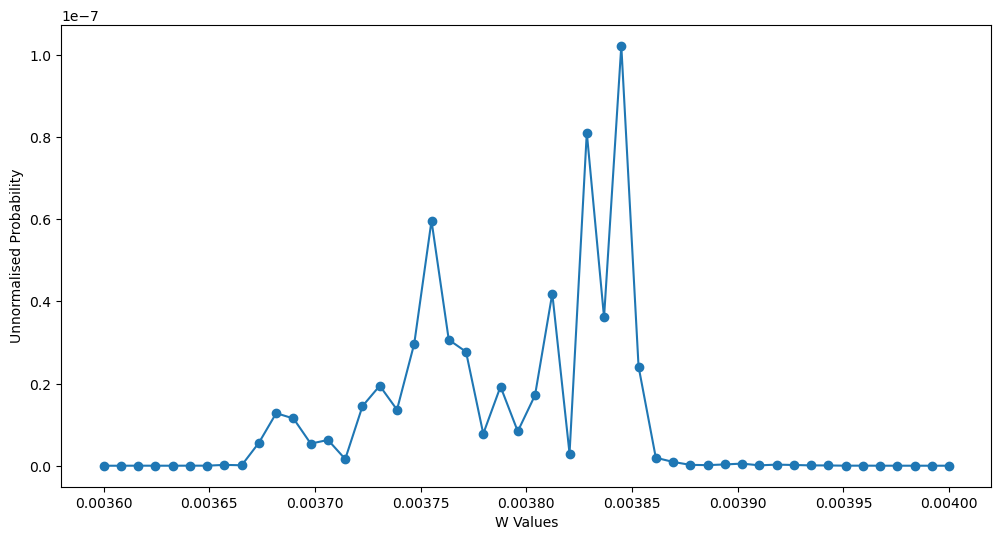

In [15]:
#Plot of given plots from paper
pc2.plot_Pd_m() #probability of bins
pc2.plot_Pw() # probability distribution of frequency

Plot of period and comparison with Gregory paper

C:\Users\balay\AppData\Local\Temp\ipykernel_2900\578543404.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


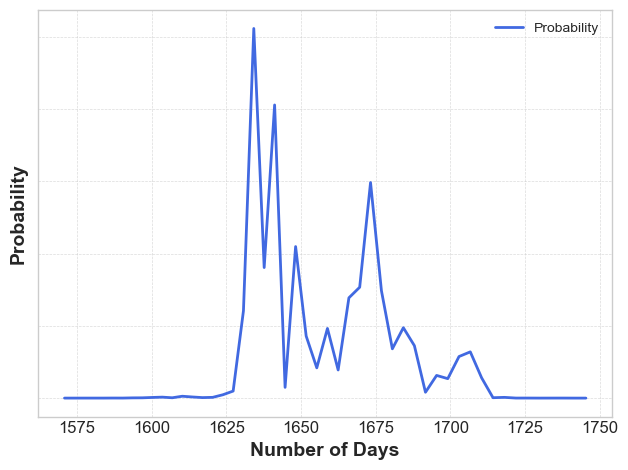

In [18]:
x = 2*np.pi/np.array(pc2.w_values)
y = np.array(pc2.prob_w)

# Set the style (optional, but gives a cleaner background)
plt.style.use('seaborn-whitegrid')

# Create the plot
fig, ax = plt.subplots()

# Plot the data with enhanced line width
ax.plot(x, y, color='royalblue', linewidth=2, label='Probability')

# Set labels for the x and y axes
ax.set_xlabel('Number of Days', fontsize=14, fontweight='bold')
ax.set_ylabel('Probability', fontsize=14, fontweight='bold')

# Hide the y-axis tick labels
ax.set_yticklabels([])

# Display the grid
ax.grid(True, linestyle='--', which='both', linewidth=0.5, alpha=0.7)

# Set the tick label size for the x-axis for better readability
ax.tick_params(axis='x', which='major', labelsize=12)

# Add a legend (optional, but can be useful with multiple lines)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()